# EDA (Exploratory Data Analysis)

## Initial Data Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np

# Define the paths to the train and test datasets
train_file_path = 'C:/Users/Timur/Desktop/Practice IT Bank Vostok/ML_Dataset/Train.csv'
test_file_path = 'C:/Users/Timur/Desktop/Practice IT Bank Vostok/ML_Dataset/Test.csv'

# Read the train and test datasets
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Specify the columns we want to remove
columns_to_remove = ['column_1', 'column_2', 'column_3', 'column_4']  

# Drop the columns
train_data.drop(columns_to_remove, axis=1, inplace=True)

# Replace infinite values with NaN
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the first few rows of the train dataset
print("First few rows of the train dataset:")
print(train_data.iloc[:5,:5])

# Display the first few rows of the test dataset
print("\nFirst few rows of the test dataset:")
print(test_data.iloc[:5].iloc[:5,:5])

First few rows of the train dataset:
   id  column_5   column_6   column_7  column_8
0   0         2  1007.9608  3960.0965    3.6600
1   1         3   520.6264  1717.0405    0.0000
2   2         1     0.0000  1425.7998    0.0000
3   3         0     0.0000   291.0967    0.0000
4   4         1     0.0000  2530.3404    3.9933

First few rows of the test dataset:
   id  column_6   column_7  column_8  column_9
0   0  317.6870  1419.7523    0.0000    7.3778
1   1    0.0000  1147.3111    0.0000    6.4608
2   2   45.3894  1331.8722    7.1933    2.1552
3   3    0.0000   743.1287    0.0000    6.9048
4   4    0.0000   261.8643    0.0000    3.1889


## Data Inspection - Types and Summary Statistics

In [2]:
# Checking the data types of the columns and generating summary statistics

# Data types
data_types = train_data.dtypes

# Summary statistics
summary_statistics = train_data.iloc[:,2:].describe()

data_types, summary_statistics

(id              int64
 column_5        int64
 column_6      float64
 column_7      float64
 column_8      float64
                ...   
 column_366      int64
 column_367      int64
 column_368      int64
 column_369      int64
 column_370      int64
 Length: 367, dtype: object,
            column_6      column_7      column_8      column_9     column_10  \
 count  30099.000000  30099.000000  30099.000000  30099.000000  30099.000000   
 mean     187.903114   1370.828448      3.601491      4.659339     51.796233   
 std      379.470803   1194.638547     11.913717      2.507822    117.999895   
 min        0.000000      0.000000      0.000000      0.333300      0.000000   
 25%        0.000000    562.800850      0.000000      2.837300      7.986700   
 50%       34.960000   1092.745800      1.663300      4.231400     30.683300   
 75%      209.332350   1852.028250      4.926700      5.933000     71.508350   
 max     8163.002600  53560.510400    685.996700     40.881500  17057.960000  

The dataset primarily consists of numerical values, both integers, and floating-point numbers, across its 367 columns. The summary statistics provide the following insights:

1 - Count: Most columns have the same number of entries (30,111). However, it's noticeable that some columns have slightly fewer entries (30,099), suggesting the presence of a few missing values.

2 - Mean: The mean values vary significantly from column to column, indicating differing scales or units.

3 - Standard Deviation (std): The standard deviation also varies, indicating differing degrees of variance in the data points. Some columns might have a wide range of values, while others could be more consistent.

4 - Min, 25%, 50%, 75%, Max: The percentile distribution and range provide insights into the skewness of the data. Some columns appear to have a very wide range, indicating the presence of extreme values or outliers.

## Handling Missing Data

In [3]:
#Filling the missing values
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(train_data.mean(), inplace=True)

#Checking for missing values in the dataset 
train_data.isnull().sum().sum()

0

The imputation process has been streamlined and applied successfully, confirming that there are no missing values in the dataset. This clean, numerical-only dataset is now more suitable for further statistical analysis and model building.

## Analyzing the Distribution of 'column_5' through Visualizations

C:\Users\Timur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Timur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Timur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


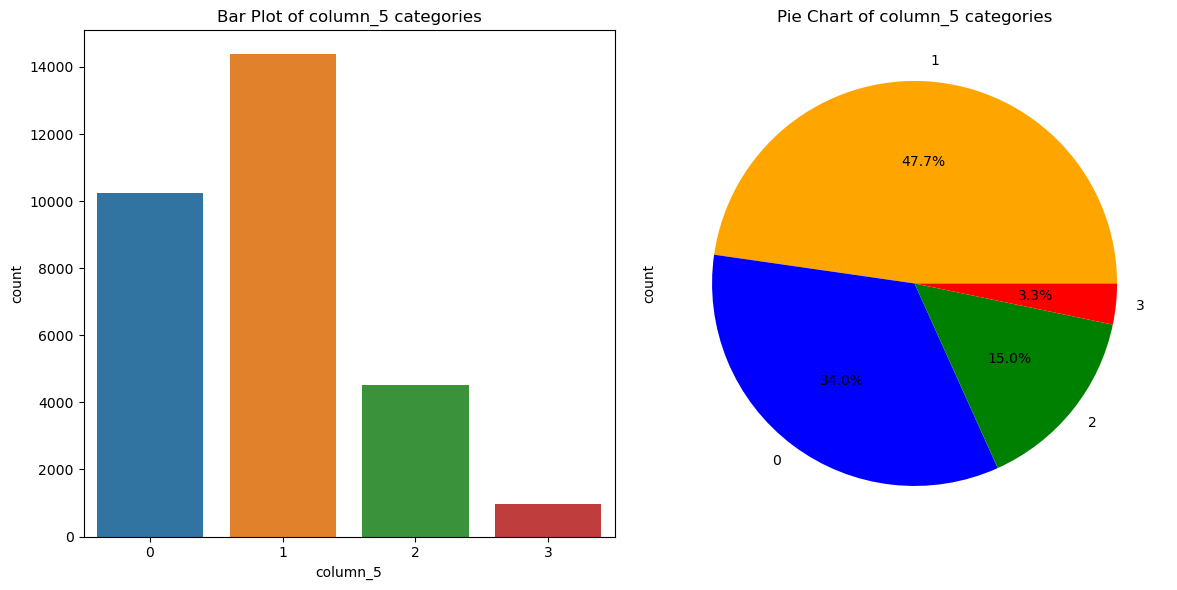

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, we need to understand the data type and distribution of 'column_5'
column_5_data = train_data['column_5']

# Visualization
plt.figure(figsize=(12, 6))

# We'll use a bar plot and pie chart
plt.subplot(1, 2, 1)
sns.countplot(x=column_5_data)
plt.title('Bar Plot of column_5 categories')

plt.subplot(1, 2, 2)
column_5_data.value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ["orange", "blue", "green", "red"])
plt.title('Pie Chart of column_5 categories')

plt.tight_layout()
plt.show()

## Understanding Inter-feature Relationships with a Correlation Heatmap

This analysis helps in understanding the linear relationship between different features, and most importantly, between the features and the target variable. It's crucial for feature selection, as it helps in identifying redundant features and potential predictors for model building.

We will calculate the correlation coefficients between pairs of features using the Pearson method, which measures linear correlation between variables. The result is a value between -1 and 1, where:

1 indicates a strong positive correlation.
-1 indicates a strong negative correlation.
0 indicates no linear correlation.

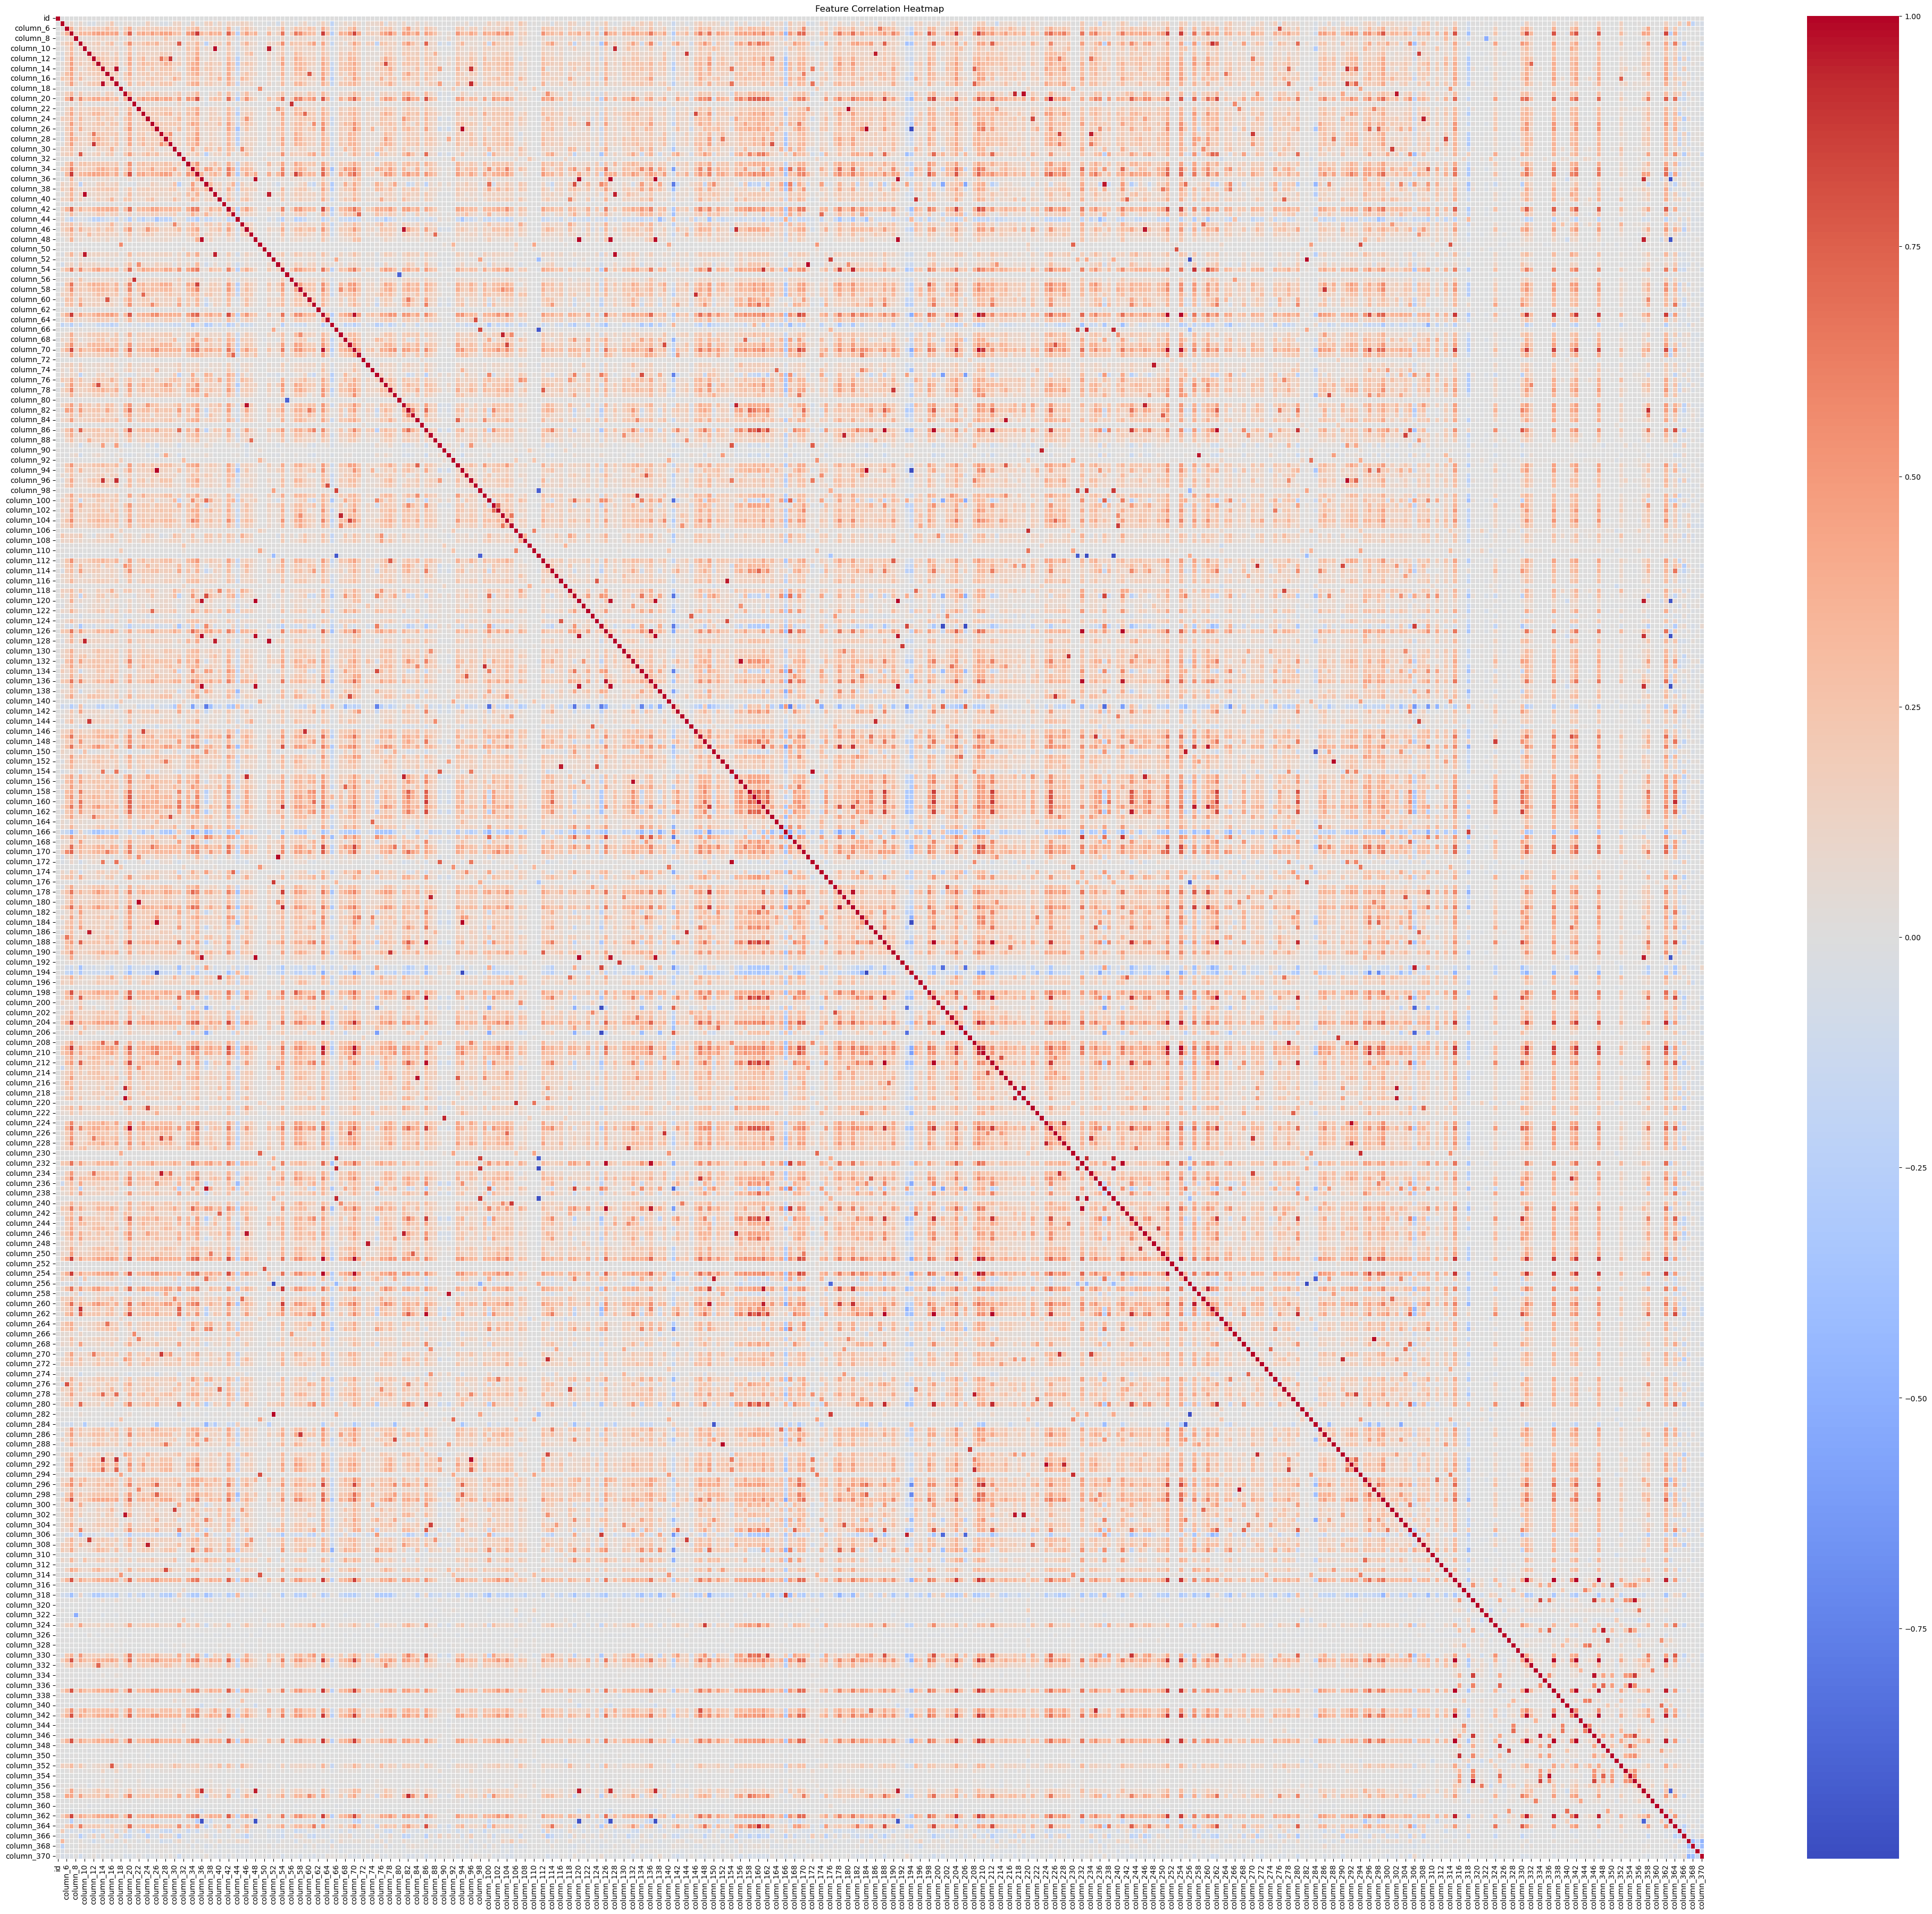

In [5]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 45)) 
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

# Show the heatmap
plt.title("Feature Correlation Heatmap")
plt.show()

Presence of Correlated Features: Several blocks of intense color suggest that there are groups of features that are highly correlated with each other. This is critical for model building as we might want to avoid multicollinearity, as it can make the model unstable by potentially overfitting to certain patterns and harming its generalization capabilities.

Correlation with Target Variable: It's essential to look at the correlation of features with 'column_5' (our target variable). Features that have a stronger correlation (indicated by color intensity) with the target variable might be particularly valuable for predictive modeling.

In [6]:
# Extracting the specific correlation values between 'column_5' and other features
target_correlations = correlation_matrix['column_5'].sort_values(ascending=False)

# Display the correlations
target_correlations

column_5      1.000000
column_367    0.322382
column_107    0.231396
column_241    0.219077
column_16     0.216436
                ...   
column_236   -0.120134
column_141   -0.126160
column_213   -0.137591
column_368   -0.195611
column_65    -0.201385
Name: column_5, Length: 367, dtype: float64

## Feature Scaling - Standardization

Standardization is a key preprocessing technique used in machine learning and statistics to transform the distribution of feature values so that they have a mean of 0 and a standard deviation of 1. This process is also commonly referred to as z-score normalization.

In [7]:
from sklearn.preprocessing import StandardScaler

feature_data = train_data.drop(['id', 'column_5'], axis=1)
feature_data_test = test_data.drop(['id'], axis=1)

# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the scaler on the feature data
# We need to ensure that only feature columns are included in scaling, excluding 'id' and 'column_5'
scaled_features = scaler.fit_transform(feature_data)
scaled_features_test = scaler.fit_transform(feature_data_test)

# Convert the scaled features back to a dataframe
scaled_features_df = pd.DataFrame(scaled_features, index=feature_data.index, columns=feature_data.columns)
scaled_features_test_df = pd.DataFrame(scaled_features_test, index=feature_data_test.index, columns=feature_data_test.columns)

# Display the first few rows of the scaled dataframe to verify the operation
scaled_features_df.head()

,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,...,column_361,column_362,column_363,column_364,column_365,column_366,column_367,column_368,column_369,column_370
0,2.161523,2.167875,0.004912,1.060137,2.904079,-0.249718,1.106697,1.329529,1.369411,0.007264,...,0.317194,1.882830,0.165975,0.486488,-0.647399,-0.901862,1.485155,-0.573273,-0.219245,-0.706209
1,0.876998,0.289867,-0.302363,1.363175,0.237089,0.274074,-1.030216,-0.240596,-0.050022,1.588042,...,-0.009382,1.232436,0.001815,1.674159,1.544643,-0.567471,1.485155,-0.573273,-0.219245,-0.706209
2,-0.495278,0.046025,-0.302363,0.999952,0.855274,-0.424324,-1.030216,-1.192974,0.486866,-0.581716,...,-0.009382,0.481362,0.001815,1.334824,-0.647399,1.522472,1.485155,-0.573273,-0.219245,-0.706209
3,-0.495278,-0.904010,-0.302363,-0.199315,-0.032320,0.972445,-1.030216,-1.192974,-0.522401,-0.581716,...,-0.009382,-0.623019,0.001815,-0.022514,-0.647399,-0.567471,-0.673330,-0.573273,-0.219245,-0.706209
4,-0.495278,0.970806,0.032894,-0.367585,0.305041,-0.424324,2.178143,0.395163,0.353271,-0.581716,...,-0.163065,0.378340,-0.051119,-1.040517,-0.647399,1.438874,-0.673330,-0.573273,4.561114,-0.706209


The data scaling was successful, and our dataset's features have been standardized. This means that they now have a mean of 0 and a standard deviation of 1, making the different features directly comparable in terms of scale.

## Split the data into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable ('column_5')
X = scaled_features_df  # features (already scaled)
y = train_data['column_5']  # target variable

# Split the data into training and testing sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

## The Baseline Model - Logistic Regression

Logistic regression is a statistical analysis method used to predict a binary outcome based on variables that are either categorical or continuous. It models the probabilities of the possible outcomes of a categorical dependent variable. The central principle is the estimation of the odds of an event occurring, utilizing the logistic function, creating a curve with an "S" shape.

In [9]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
baseline_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy of Logistic Regression model:", baseline_accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy of Logistic Regression model: 0.5969455511288181

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61      1024
           1       0.61      0.73      0.66      1438
           2       0.50      0.26      0.34       452
           3       0.42      0.26      0.32        98

    accuracy                           0.60      3012
   macro avg       0.54      0.46      0.48      3012
weighted avg       0.59      0.60      0.58      3012



C:\Users\Timur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the model is approximately 59.7%

Precision is the ratio of true positive predictions to the sum of true positive and false positive predictions. It’s an indication of the correctness achieved.

Recall (or sensitivity) is the ratio of true positive predictions to the sum of true positive and false negative predictions. It indicates how comprehensively the model finds relevant instances.

The F1-score is the harmonic mean of precision and recall, providing a balance between them.

Looking at the class-wise metrics:

Class '1' has the highest number of instances and also the best recall, meaning the model is better at detecting this class than others. However, this comes at slightly lower precision, implying more false positives.

Class '2' and class '3', with fewer instances, have lower recall, indicating that the model struggles more to detect these classes—this is a common scenario in imbalanced datasets.

The F1-scores also reflect this pattern, with class '1' having the highest score, indicating a better balance between precision and recall, and classes '2' and '3' having lower scores.

## Random Forest

Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It utilizes a multitude of decision trees, proposing various solutions and combining them to produce improved overall results, a technique known as 'ensemble learning'. Each decision tree is built on a random subset of the data, using random subsets of the features at each split, making the model robust to overfitting. Random Forest aggregates the predictions of each tree, taking the majority vote as the final prediction for classification or the average in regression. This approach's strength lies in its high accuracy, ability to deal with unbalanced and missing data, and its provision of feature importance scores.

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Accuracy of RandomForest model:", rf_accuracy)
print("\nClassification Report:\n", classification_rep_rf)

Accuracy of RandomForest model: 0.5956175298804781

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.54      0.59      1024
           1       0.58      0.82      0.68      1438
           2       0.52      0.14      0.22       452
           3       0.42      0.08      0.14        98

    accuracy                           0.60      3012
   macro avg       0.54      0.39      0.41      3012
weighted avg       0.59      0.60      0.56      3012



The overall accuracy increased to approximately 59.56%

Class '1' shows a high recall, meaning the model is quite good at capturing this class. However, its precision is not as high, implying that when the model predicts an instance to be in class '1', it's correct 58% of the time. The F1-score for class '1' is reasonably good, considering it balances precision and recall.

Class '0' has decent scores, indicating a moderate level of precision and recall. The model performs fairly well on this class.

Class '2' and Class '3' are where the model struggles significantly, especially with recall. This suggests that the model misses a large number of actual instances from these classes. Their low F1-scores also indicate that the model isn't predicting these classes well.

## Light GBM

Light GBM, or Light Gradient Boosting Machine, is a highly efficient gradient boosting framework that uses tree-based learning algorithms, designed for distributed and faster training. It diverges from traditional boosting methods by growing trees vertically (leaf-wise) rather than horizontally (level-wise), choosing the leaf with the maximum delta loss to grow, and resulting in better accuracy and efficiency. Light GBM is capable of performing regression, classification, ranking, and other tasks, and is well-suited for handling large datasets with lower memory usage. It supports GPU learning, and its core advantages include faster training speed, higher efficiency, and compatibility with large datasets. Despite its speed and efficiency, Light GBM can be sensitive to overfitting and requires careful tuning of its parameters, necessitating a good understanding of the principles of machine learning.

In [11]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize a LightGBM classifier object
lgbm_model = LGBMClassifier(objective='multiclass', random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the predictions
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)

print("Accuracy of LightGBM model:", accuracy_lgbm)
print("\nClassification Report:\n", classification_rep_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82073
[LightGBM] [Info] Number of data points in the train set: 27099, number of used features: 365
[LightGBM] [Info] Start training from score -1.078447
[LightGBM] [Info] Start training from score -0.739637
[LightGBM] [Info] Start training from score -1.897083
[LightGBM] [Info] Start training from score -3.423927
Accuracy of LightGBM model: 0.6397742363877822

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.66      1024
           1       0.64      0.78      0.70      1438
           2       0.52      0.32      0.40       452
           3       0.55      0.23      0.33        98

    accuracy                           0.64      3012
   macro avg       0.60      0.49      0.52      3012
weighted avg       0.63      0.64      0.

The LightGBM model has an accuracy of approximately 64%

Precision and Recall:

The model maintains decent performance for classes '0' and '1', indicating these classes are more distinguishable with the available features.

The precision for class '2' is moderate, but the recall is low, implying the model misses a significant number of true positive instances for this class. This could be due to overlapping features between classes, insufficient distinctive features, or class imbalance.

Class '3' continues to be challenging, with both precision and recall on the lower side, possibly because it might be the minority class with complex or insufficiently captured characteristics.

F1-Score: The F1-scores correspond with the precision and recall metrics. Classes '0' and '1' are reasonably well-handled, but classes '2' and '3' are areas where the model struggles.

## The best model Result as CSV-file.

In [12]:
# Train the model
lgbm_model.fit(X, y)

# Predict the labels of the test set
y_pred_test = lgbm_model.predict(scaled_features_test_df)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(y_pred_test, columns=['classes'])

# Create an 'id' column with values from 0 to the length of the predictions list
predictions_df['id'] = range(0, len(predictions_df))

# Rearrange the columns to have 'id' first
predictions_df = predictions_df[['id', 'classes']]

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82210
[LightGBM] [Info] Number of data points in the train set: 30111, number of used features: 365
[LightGBM] [Info] Start training from score -1.078491
[LightGBM] [Info] Start training from score -0.739609
[LightGBM] [Info] Start training from score -1.897042
[LightGBM] [Info] Start training from score -3.424073
